In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, ReLU, LeakyReLU, BatchNormalization, MaxPooling2D, Dropout
from keras.utils import to_categorical
import datetime

In [2]:
#path to the data set
path_to_data = r'C:\Users\cig79850\Downloads\Kaggle_CatsVSDogs\kagglecatsanddogs_3367a\PetImages'

In [3]:
# declaring features and label holders
features_m_3 = []
labels_m_3 = []
size = (128, 128) # We will resize the feature to size so each feature is 

In [4]:
# Now we need to import images and 
# Let's create a function  for that.
# it will take folder names as we have two folder containing two classes
# don't forget to put / after the folder name, painful realization
# path_to_cats = r"C:\Users\cig79850\Downloads\Kaggle_CatsVSDogs\kagglecatsanddogs_3367a\PetImages\Cat"
# path_to_dogs = r"C:\Users\cig79850\Downloads\Kaggle_CatsVSDogs\kagglecatsanddogs_3367a\PetImages\Dog"
# alternatively 
path_to_cats = path_to_data + '/Cat/'
path_to_dogs = path_to_data + '/Dog/'

def data_preprocessing(folder, label):
    files = os.listdir(folder) #files now  contains all the images found in'folder'
    for file in files:
        img = cv2.imread(folder+file)
        if img is not None: # if the file is not empty
            img = cv2.resize(img, dsize = size)
            features_m_3.append(img)
            labels_m_3.append(label)

data_preprocessing(path_to_cats, 0) # we are setting label 0 for cats and 1 for dogs
data_preprocessing(path_to_dogs, 1)

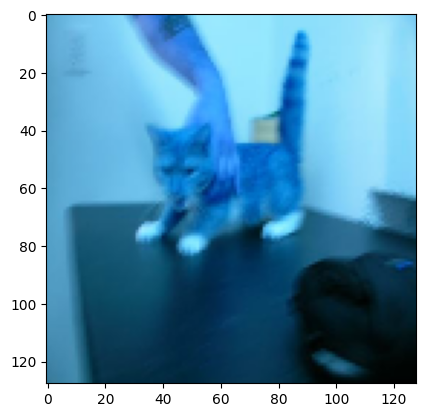

In [5]:
len(features_m_3), len(labels_m_3)

plt.imshow(features_m_3[0])

In [ ]:
# features_m_3.shape, labels_m_3.shape # Running this will give error

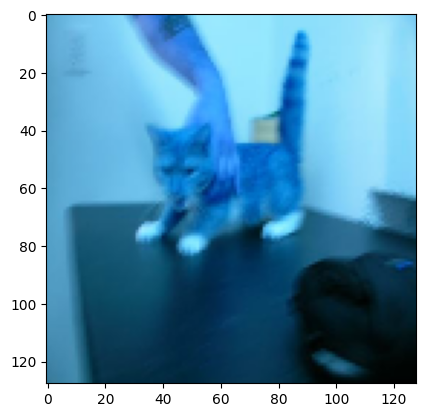

In [6]:
# experiments
temp_features = features_m_3
temp_labels = labels_m_3

# experiments

plt.imshow(temp_features[12233])

# experiments
features_np_temp = np.array(temp_features) #.astype(np.float32)
plt.imshow(features_np_temp[0])

In [7]:
# It is a vital process.
features_np = np.array(features_m_3).astype(np.float32)
labels_np = np.array(labels_m_3).astype(np.float32)
# images = np.array(images).astype(float32)
# labels = np.array(labels).astype(float32)

In [8]:
features_np.shape, labels_np.shape
img  = features_np[0]
img.dtype

dtype('float32')

In [9]:
#important - normalizing the data
features_normalized = features_np/255

Text(0.5, 1.0, '0.0')

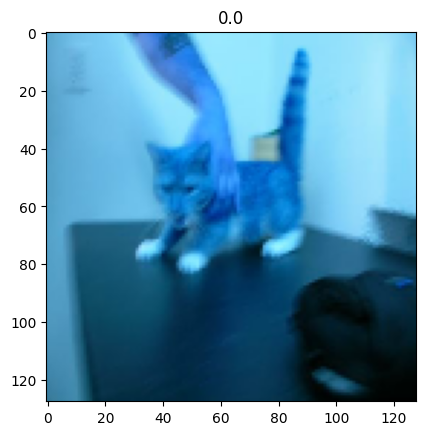

In [10]:
#visualization
img = features_normalized[0]
img.shape , plt.imshow(img)
plt.title(labels_np[0])

Text(0.5, 1.0, 'Cat')

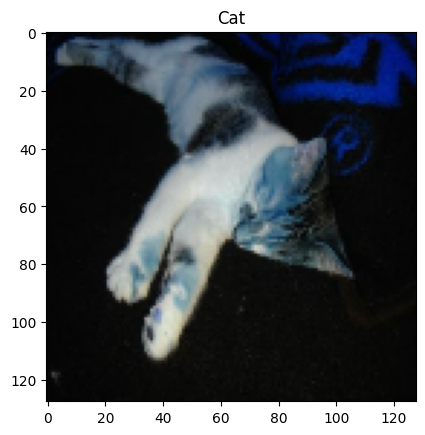

In [11]:
#visualization
index = np.random.randint(0, len(features_normalized))
img = features_normalized[index]
label = labels_np[index]
if label == 0:
    title = "Cat"
elif label == 1:
    title = "Dog"
plt.imshow(img)
plt.title(title)

In [12]:
#visualization
def random_sample(features, labels):
    index = np.random.randint(0, len(features))
    img = features[index]
    label = labels[index]
    print(label)
    if(labels.ndim>1): 
        if label[0]==1:
            title = "Cat"
        else:
            title = "Dog"
    else:
        if label==0:
            title = "Cat"
        else:
            title = "Dog"
    plt.imshow(img)
    plt.title(title)

1.0


(24913, 24913)

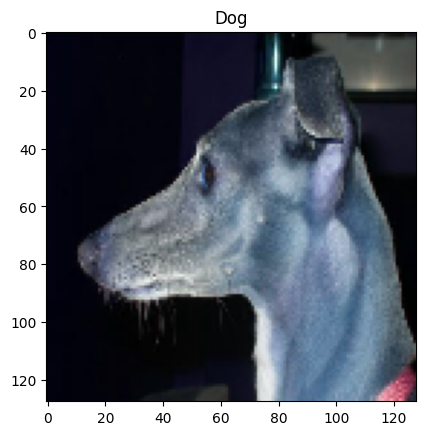

In [13]:
random_sample(features_normalized, labels_np)

len(features_normalized), len(labels_np)

In [14]:
train_features_m, test_features_m, train_labels_m, test_labels_m = train_test_split(features_normalized, labels_np, test_size = 0.2)

0.0


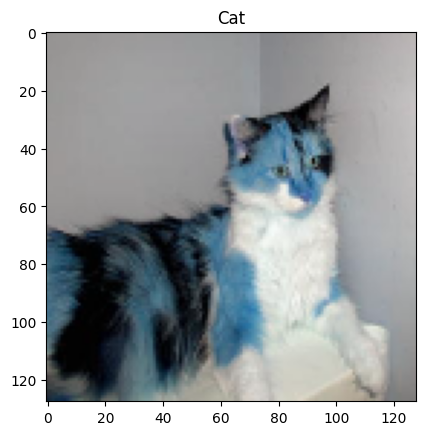

In [15]:
len(train_features_m), len(train_labels_m)

random_sample(train_features_m, train_labels_m)

In [16]:
train_labels_onehot = to_categorical(train_labels_m)
test_labels_onehot = to_categorical(test_labels_m)

In [17]:
#Saving the dataset, saves time and  computation
path = r'C:\Users\cig79850\Deep_Learning_Class\hw2\ '
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

np.save(path + 'train_features_load_'+ timestamp +'.npy', train_features_m)
np.save(path + 'train_labels_load_'+ timestamp + '.npy' , train_labels_onehot)

np.save(path+ 'test_features_load_' + timestamp +'.npy' , test_features_m)
np.save(path + 'test_labels_load_' + timestamp + '.npy', test_labels_onehot)

In [18]:
train_features = np.load(r'C:\Users\cig79850\Deep_Learning_Class\hw2\ train_features_load_'+ timestamp + '.npy')
test_features = np.load(r'C:\Users\cig79850\Deep_Learning_Class\hw2\ test_features_load_'+ timestamp + '.npy')
train_labels = np.load(r'C:\Users\cig79850\Deep_Learning_Class\hw2\ train_labels_load_'+ timestamp + '.npy')
test_labels = np.load(r'C:\Users\cig79850\Deep_Learning_Class\hw2\ test_labels_load_'+ timestamp + '.npy')

[0. 1.]


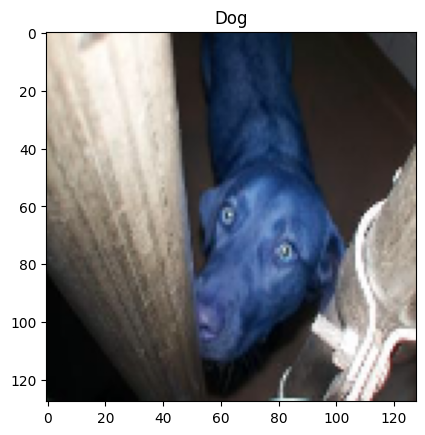

In [19]:
len(test_features), len(test_labels)

train_labels.shape

train_labels[0]

train_labels.ndim

random_sample(train_features, train_labels)

input_shape = train_features[0].shape

In [21]:
# Let's try AlexNet and see how it goes!

def cnn_alex(input_shape, num_classes):
    tf.random.set_seed(42)
    model = Sequential()
    
#     model.add(Input(input_shape = (128, 128, 3))),
    model.add(Conv2D(96, input_shape = input_shape, kernel_size=(11,11), strides=(4,4), activation = 'relu')),
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides =(2,2))),
    model.add(Conv2D(256, kernel_size=(5,5), padding='same', activation = 'relu')),
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))),
    
    model.add(Conv2D(384, kernel_size=(3,3),padding='same', activation = 'relu')),
    model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation = 'relu')),
    model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation = 'relu')),
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))),
    
    
    model.add(Flatten()),
    model.add(Dense(4096, activation = 'relu')),
    model.add(Dropout(rate = 0.5)),
    model.add(Dense(4096, activation = 'relu')),
    model.add(Dropout(rate = 0.5)),
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ['accuracy'])
    return model

In [22]:
# input_shape = train_features[0].shape
model_alex = cnn_alex(input_shape, 2)
model_alex.summary()
history_cnn_alex = model_alex.fit(train_features, train_labels, epochs =50, batch_size = 128)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 30, 30, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 256)       1024      
 chNormalization)                                                
                                                      

In [23]:
model_alex.evaluate(test_features, test_labels)

156/156 [==============================] - 7s 45ms/step - loss: 0.7649 - accuracy: 0.8593


[0.7648955583572388, 0.8593217134475708]

<Axes: >

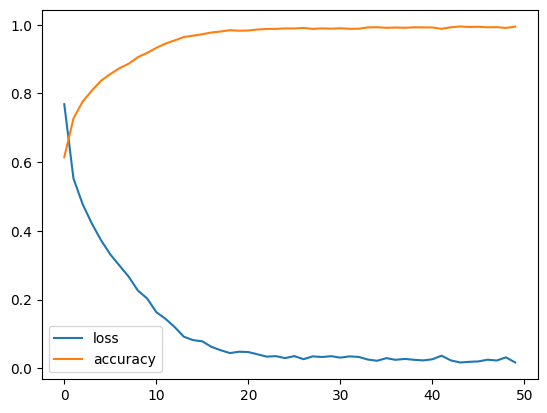

In [24]:
pd.DataFrame(history_cnn_alex.history).plot()

In [25]:
try:
    model_alex.save(r'C:\Users\cig79850\Deep_Learning_Class\hw2\ model_alex_load_Trial_1_1.')
    print("Model saved")
except:
    print("Model could  not be saved")

Model saved


In [26]:
#visualization
def random_prediction(features, model):
    index = np.random.randint(0, len(features))
    img = features[index]
    img =img.reshape( (1, 128, 128,3))
    prediction  = model(img)
    img = tf.squeeze(img)
    prediction =tf.squeeze(prediction)
    
    if(prediction[0]>prediction[1]):
        title = 'Cat'
    else:
        title  = 'Dog'
    plt.imshow(img)
    plt.title(title)

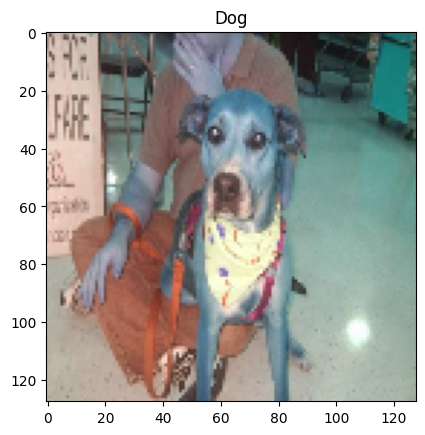

In [27]:
random_prediction(test_features, model_alex)

In [20]:
def very_simple_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(34, input_shape = input_shape, kernel_size=(5,5), strides=(2,2), activation = 'relu')),
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (3,3), strides =(2,2))),
    model.add(Conv2D(34, kernel_size=(3,3), padding = 'same', activation = 'relu')),
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size = (3,3))),
    model.add(Dense(10, activation = 'relu')),
    model.add(Flatten()),
    model.add(Dense(2, activation = 'softmax'))
    
    model.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ['accuracy'])
    return model

In [21]:
simple_cnn = very_simple_cnn(input_shape, 2)
simple_cnn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 34)        2584      
                                                                 
 batch_normalization (Batch  (None, 62, 62, 34)        136       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 34)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 34)        10438     
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 34)        136       
 chNormalization)                                                
                                                      

In [22]:
history_cimple_cnn = simple_cnn.fit(train_features, train_labels, epochs =100)

Epoch 1/100


623/623 [==============================] - 29s 44ms/step - loss: 0.5900 - accuracy: 0.6924
Epoch 2/100
623/623 [==============================] - 31s 49ms/step - loss: 0.4875 - accuracy: 0.7684
Epoch 3/100
623/623 [==============================] - 30s 48ms/step - loss: 0.4414 - accuracy: 0.7965
Epoch 4/100
623/623 [==============================] - 30s 48ms/step - loss: 0.4120 - accuracy: 0.8118
Epoch 5/100
623/623 [==============================] - 30s 48ms/step - loss: 0.3861 - accuracy: 0.8247
Epoch 6/100
623/623 [==============================] - 30s 48ms/step - loss: 0.3665 - accuracy: 0.8365
Epoch 7/100
623/623 [==============================] - 29s 46ms/step - loss: 0.3525 - accuracy: 0.8419
Epoch 8/100
623/623 [==============================] - 29s 46ms/step - loss: 0.3361 - accuracy: 0.8509
Epoch 9/100
623/623 [==============================] - 29s 46ms/step - loss: 0.3259 - accuracy: 0.8548
Epoch 10/100
623/623 [==============================] - 29s 46ms/step -

In [23]:
simple_cnn.evaluate(test_features, test_labels)

156/156 [==============================] - 2s 13ms/step - loss: 1.0224 - accuracy: 0.8254


[1.0223979949951172, 0.8254063725471497]

<Axes: >

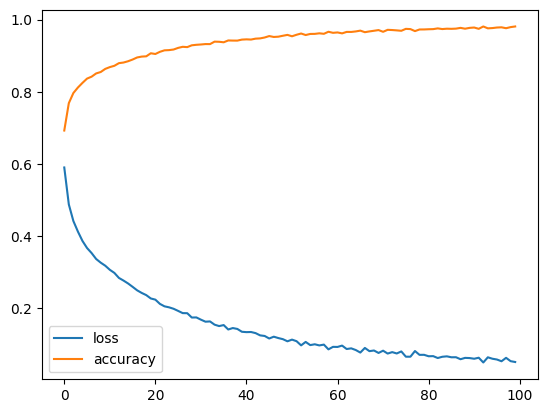

In [24]:
pd.DataFrame(history_cimple_cnn.history).plot()

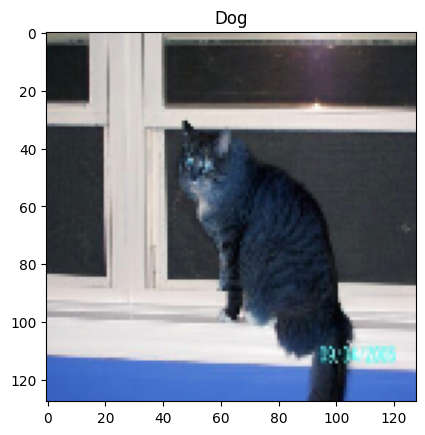

In [27]:
random_prediction(test_features, simple_cnn)

In [29]:
try:
    simple_cnn.save(r'C:\Users\cig79850\Deep_Learning_Class\hw2\ model_simple_cnn_load_trial_3_2.keras')
    print("Model saved")
except:
    print("Model could  not be saved")

Model saved


In [59]:
#another model
def test_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(96, input_shape = input_shape, kernel_size=(11,11), strides=(4,4), activation = 'relu')),
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size = (3,3), strides =(2,2))),
#     model.add(Conv2D(256, kernel_size=(5,5), padding='same', activation = 'relu')),
#     model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))),
    
    model.add(Conv2D(384, kernel_size=(3,3),padding='same', activation = 'relu')),
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2))),
    model.add(Flatten()),
    model.add(Dense(64, activation = 'relu')),
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                 metrics = ['accuracy'])
    return model

In [60]:
model_simple = test_model(input_shape, 2)
model_simple.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization_5 (Bat  (None, 30, 30, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 384)       332160    
                                                                 
 batch_normalization_6 (Bat  (None, 14, 14, 384)       1536      
 chNormalization)                                                
                                                      

In [61]:
history_cnn_simple =  model_simple.fit(train_features, train_labels, epochs =10)

Epoch 1/10
912/912 [==============================] - 56s 61ms/step - loss: 0.7384 - accuracy: 0.6563
Epoch 2/10
912/912 [==============================] - 56s 61ms/step - loss: 0.5408 - accuracy: 0.7363
Epoch 3/10
912/912 [==============================] - 58s 63ms/step - loss: 0.4761 - accuracy: 0.7822
Epoch 4/10
912/912 [==============================] - 57s 63ms/step - loss: 0.4201 - accuracy: 0.8138
Epoch 5/10
912/912 [==============================] - 59s 65ms/step - loss: 0.3792 - accuracy: 0.8354
Epoch 6/10
912/912 [==============================] - 59s 65ms/step - loss: 0.3506 - accuracy: 0.8522
Epoch 7/10
912/912 [==============================] - 59s 65ms/step - loss: 0.3181 - accuracy: 0.8671
Epoch 8/10
912/912 [==============================] - 59s 65ms/step - loss: 0.2875 - accuracy: 0.8828
Epoch 9/10
912/912 [==============================] - 58s 64ms/step - loss: 0.2671 - accuracy: 0.8926
Epoch 10/10
912/912 [==============================] - 59s 65ms/step - loss: 0.235

In [63]:
model_simple.evaluate(test_features, test_labels)

228/228 [==============================] - 5s 20ms/step - loss: 0.3834 - accuracy: 0.8525


[0.38337570428848267, 0.852481484413147]